In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from scipy import signal
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [2]:
file = '~/galvanize/capstones/PredictingSearches-on-EDGAR/Logs/170403.csv'
df = pd.read_csv(file, names=['IP','Date','Time','Accession'])

In [3]:
Uniq = df.Accession.unique()
u = np.random.choice(Uniq, 100000)

In [4]:
df1 = df[df['Accession'].isin(u)]

In [5]:
df1 = df1.reset_index()

In [6]:
df['Datetime'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [7]:
df[df.Accession.str.contains('0001415889-17-000555')]

,IP,Date,Time,Accession,Datetime
494,69.191.249.caa,2017-04-03,00:00:01,0001415889-17-000555,2017-04-03 00:00:01
497,69.191.249.gge,2017-04-03,00:00:01,0001415889-17-000555,2017-04-03 00:00:01
723,64.124.25.jig,2017-04-03,00:00:02,0001415889-17-000555,2017-04-03 00:00:02
1009,64.124.25.jig,2017-04-03,00:00:03,0001415889-17-000555,2017-04-03 00:00:03
1039,69.191.249.bgg,2017-04-03,00:00:03,0001415889-17-000555,2017-04-03 00:00:03
...,...,...,...,...,...
26126120,121.40.120.iee,2017-04-03,23:51:23,0001415889-17-000555,2017-04-03 23:51:23
26127834,117.89.48.aed,2017-04-03,23:51:29,0001415889-17-000555,2017-04-03 23:51:29
26127835,117.89.48.aed,2017-04-03,23:51:29,0001415889-17-000555,2017-04-03 23:51:29
26159902,141.160.13.ihd,2017-04-03,23:53:24,0001415889-17-000555,2017-04-03 23:53:24


In [25]:
df['Counts_Hour'] = df.groupby([df.Datetime.dt.hour,df.Accession]).cumcount()+1

In [36]:
df_a = df[df.Accession.str.contains('0001584509-16-000514')]

In [53]:
df_a1 = df_a.groupby([df_a.Datetime.dt.hour,df_a.Accession]).max()

(array([736422.   , 736422.125, 736422.25 , 736422.375, 736422.5  ,
        736422.625, 736422.75 , 736422.875, 736423.   ]),
 <a list of 9 Text xticklabel objects>)

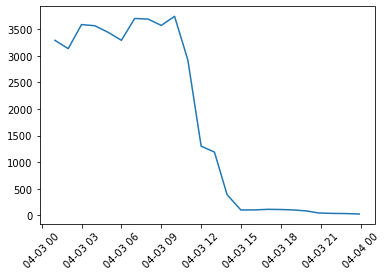

In [62]:
plt.plot(df_a1.Datetime, df_a1.Counts_Hour)
plt.xticks(rotation=45)

In [40]:
hits = df_a['Counts_Hour']

(array([736422.   , 736422.125, 736422.25 , 736422.375, 736422.5  ,
        736422.625, 736422.75 , 736422.875, 736423.   ]),
 <a list of 9 Text xticklabel objects>)

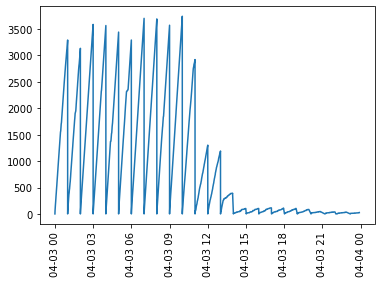

In [45]:
plt.plot(df_a.Datetime, hits)
plt.xticks(rotation=90)

In [47]:
hitsa = df_a.groupby(df_a.Datetime.dt.hour).cumsum()

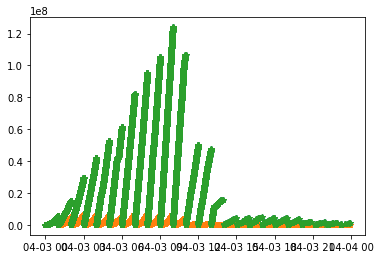

In [51]:
plt.plot(df_a.Datetime, hitsa,"*")


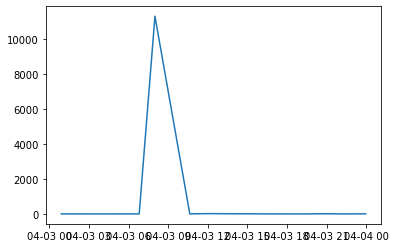

In [57]:
df_b = df[df.Accession.str.contains('0001584509-16-000514')]
df_b1 = df_b.groupby([df_b.Datetime.dt.hour,df_b.Accession]).max()
plt.plot(df_b1.Datetime, df_b1.Counts_Hour)

In [58]:
doc = '0001179110-17-005327'

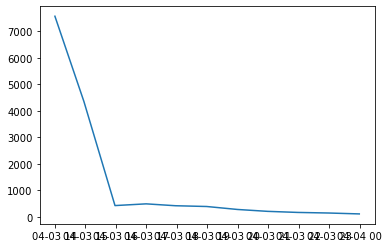

In [60]:
df_c = df[df.Accession.str.contains(doc)]
df_c1 = df_c.groupby([df_c.Datetime.dt.hour,df_c.Accession]).max()
plt.plot(df_c1.Datetime, df_c1.Counts_Hour)